### Library 

In [4]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats

path_main_folder = '/home/antorosi/Documents/AutoEncoder'

sys.path.append(path_main_folder)

from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE
from conso.load_shape_data import *  
from conso.conso_helpers import plot_latent_space_projection, pyplot_latent_space_projection_temp, pyplot_latent_space_projection_error

### Load and shape data 

In [5]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [6]:
# Load Holiday day information
holiday_days_csv = os.path.join(path_data, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [7]:
# Unifomization
data_conso_df, dict_colnames_conso = get_uniformed_data_conso(dict_data_conso)

In [8]:
# Change ganularity ?
name_granu = '30m'
data_conso_df = change_granularity(data_conso_df, granularity="30min")

In [9]:
# Get x_conso dataframe for autoencoder purpose
x_conso = get_x_conso_autoencoder(data_conso_df, dict_colnames_conso)

### Build dataset 

In [10]:
# Split train and test
#date_test_start = datetime.date(2014,1,1)
#date_test_end = datetime.date(2015,1,1)
#dict_xconso = get_train_test_x_conso(x_conso, date_test_start, date_test_end)

dict_xconso = {'train': x_conso}

In [11]:
# Normalize x_conso
type_scaler = 's'
dict_xconso = normalize_xconso(dict_xconso, dict_colnames_conso, type_scaler = 'standard')

In [18]:
name_type_cond = 'm-wd'
name_train = '0' # 1: first period ; 0 all periods
name_type_x = 'c-temp'
type_x = ['conso', 'temperature']
type_cond = ['month', 'weekday']

In [19]:
dataset = get_dataset_autoencoder(dict_xconso=dict_xconso, type_x=type_x, type_cond=type_cond)

In [20]:
dataset['train']['x'][0].shape

(1830, 96)

### Build model

In [21]:
path_out = os.path.join(path_main_folder, 'out')

In [31]:
# Parameters
cond_dim = dataset['train']['x'][1].shape[1]
e_dims=[48,24,12]
d_dims=[12,24,48]
z_dim= 2
beta = 0.6

In [32]:
name_model = 'cvae_conso_e48-24-12_d12-24-48_gran-{}_x-{}_cond-{}'.format(name_granu,name_type_x, name_type_cond)

In [33]:
name_model

'cvae_conso_e48-24-12_d12-24-48_gran-30m_x-c-temp_cond-m-wd'

In [34]:
model = CVAE(cond_dim=cond_dim, 
             e_dims=e_dims, 
             d_dims=d_dims, 
             z_dim=z_dim, 
             beta=beta,
             name=name_model, 
             output=path_out)

complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_true (InputLayer)             (None, 96)           0                                            
__________________________________________________________________________________________________
cond (InputLayer)               (None, 14)           0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 6856        x_true[0][0]                     
                                                                 cond[0][0]                       
__________________________________________________________________________________________________
sample_z (Lambda)               (None, 2)            0           encoder[1][0]              

### Trainning model 



--- START TRAINING ---

Epoch 1/200
1830/1830 [==============================] - 0s 164us/step - loss: 40.5645 - kl_loss: 7.1350 - recon_loss: 36.2835
Epoch 2/200
1830/1830 [==============================] - 0s 71us/step - loss: 13.7332 - kl_loss: 5.1540 - recon_loss: 10.6408
Epoch 3/200
1830/1830 [==============================] - 0s 70us/step - loss: 10.8364 - kl_loss: 4.4733 - recon_loss: 8.1524
Epoch 4/200
1830/1830 [==============================] - 0s 73us/step - loss: 8.8246 - kl_loss: 4.3221 - recon_loss: 6.2313
Epoch 5/200
1830/1830 [==============================] - 0s 71us/step - loss: 7.5435 - kl_loss: 4.3195 - recon_loss: 4.9518
Epoch 6/200
1830/1830 [==============================] - 0s 70us/step - loss: 7.0394 - kl_loss: 4.3788 - recon_loss: 4.4121
Epoch 7/200
1830/1830 [==============================] - 0s 70us/step - loss: 6.5886 - kl_loss: 4.3436 - recon_loss: 3.9824
Epoch 8/200
1830/1830 [==============================] - 0s 74us/step - loss: 6.2318 - kl_loss: 4.22

1830/1830 [==============================] - 0s 69us/step - loss: 4.2587 - kl_loss: 3.0225 - recon_loss: 2.4452
Epoch 67/200
1830/1830 [==============================] - 0s 75us/step - loss: 4.2430 - kl_loss: 2.9653 - recon_loss: 2.4638
Epoch 68/200
1830/1830 [==============================] - 0s 74us/step - loss: 4.2082 - kl_loss: 2.9439 - recon_loss: 2.4419
Epoch 69/200
1830/1830 [==============================] - 0s 73us/step - loss: 4.2260 - kl_loss: 2.9441 - recon_loss: 2.4596
Epoch 70/200
1830/1830 [==============================] - 0s 73us/step - loss: 4.2501 - kl_loss: 3.0190 - recon_loss: 2.4387
Epoch 71/200
1830/1830 [==============================] - 0s 72us/step - loss: 4.1831 - kl_loss: 2.9060 - recon_loss: 2.4395
Epoch 72/200
1830/1830 [==============================] - 0s 73us/step - loss: 4.1680 - kl_loss: 2.9158 - recon_loss: 2.4185
Epoch 73/200
1830/1830 [==============================] - 0s 78us/step - loss: 4.1843 - kl_loss: 2.9119 - recon_loss: 2.4371
Epoch 74/200


1830/1830 [==============================] - 0s 70us/step - loss: 3.8269 - kl_loss: 2.6424 - recon_loss: 2.2414
Epoch 132/200
1830/1830 [==============================] - 0s 75us/step - loss: 3.8037 - kl_loss: 2.6588 - recon_loss: 2.2085
Epoch 133/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.8094 - kl_loss: 2.5576 - recon_loss: 2.2748
Epoch 134/200
1830/1830 [==============================] - 0s 75us/step - loss: 3.8509 - kl_loss: 2.6853 - recon_loss: 2.2397
Epoch 135/200
1830/1830 [==============================] - 0s 72us/step - loss: 3.8315 - kl_loss: 2.6739 - recon_loss: 2.2272
Epoch 136/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.7987 - kl_loss: 2.6115 - recon_loss: 2.2318
Epoch 137/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.7810 - kl_loss: 2.6071 - recon_loss: 2.2168
Epoch 138/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.7806 - kl_loss: 2.6104 - recon_loss: 2.2143
Epoch 

1830/1830 [==============================] - 0s 69us/step - loss: 3.6502 - kl_loss: 2.5879 - recon_loss: 2.0974
Epoch 197/200
1830/1830 [==============================] - 0s 74us/step - loss: 3.6572 - kl_loss: 2.5982 - recon_loss: 2.0983
Epoch 198/200
1830/1830 [==============================] - 0s 69us/step - loss: 3.6569 - kl_loss: 2.6227 - recon_loss: 2.0833
Epoch 199/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.6633 - kl_loss: 2.5900 - recon_loss: 2.1093
Epoch 200/200
1830/1830 [==============================] - 0s 70us/step - loss: 3.6662 - kl_loss: 2.6017 - recon_loss: 2.1052


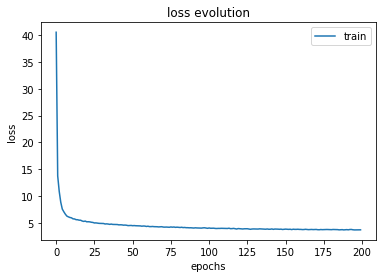

In [35]:
model.main_train(dataset, training_epochs=200, batch_size=20, verbose=False)

### Loading model 

In [202]:
#model.load_model(os.path.join(path_out, name_model, 'models'))

### Analysis of the latent space

In [36]:
name_set_plot = 'train'
version = '-v2'

In [37]:
x_encoded = model.encoder.predict(dataset[name_set_plot]['x'])[0]

In [38]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

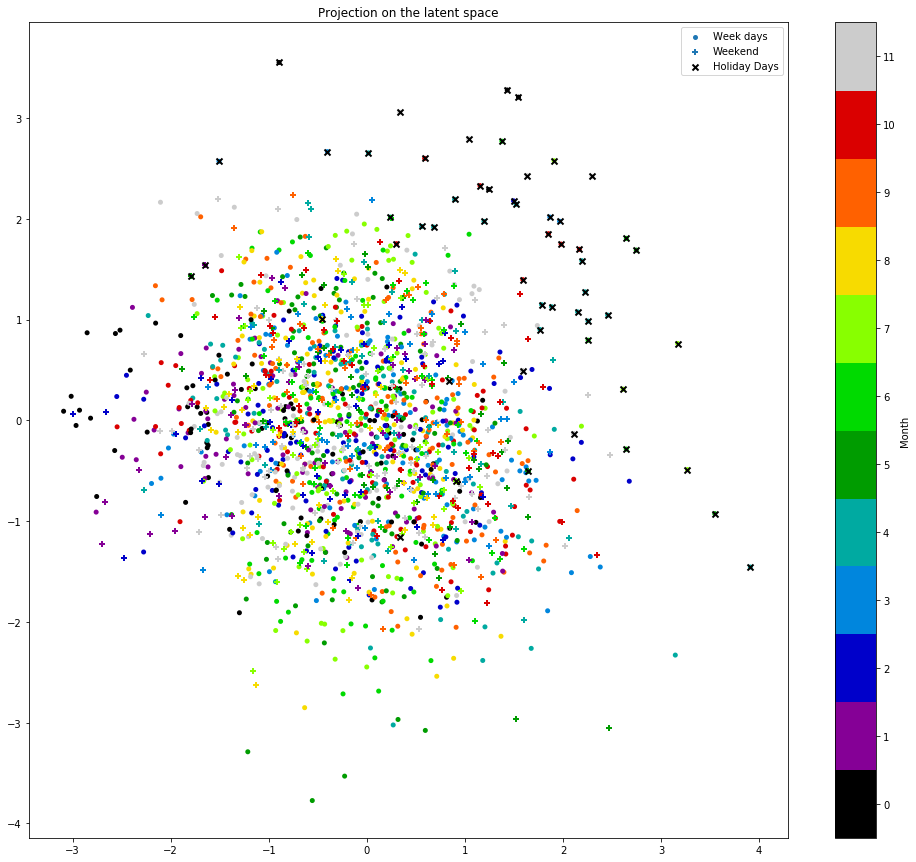

In [39]:
name_plot = 'z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
plot_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=os.path.join(path_out,name_model,'results'), name=name_plot, 
                             pyplot=True, plotly = False)

In [40]:
temp = get_cond_autoencoder(dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

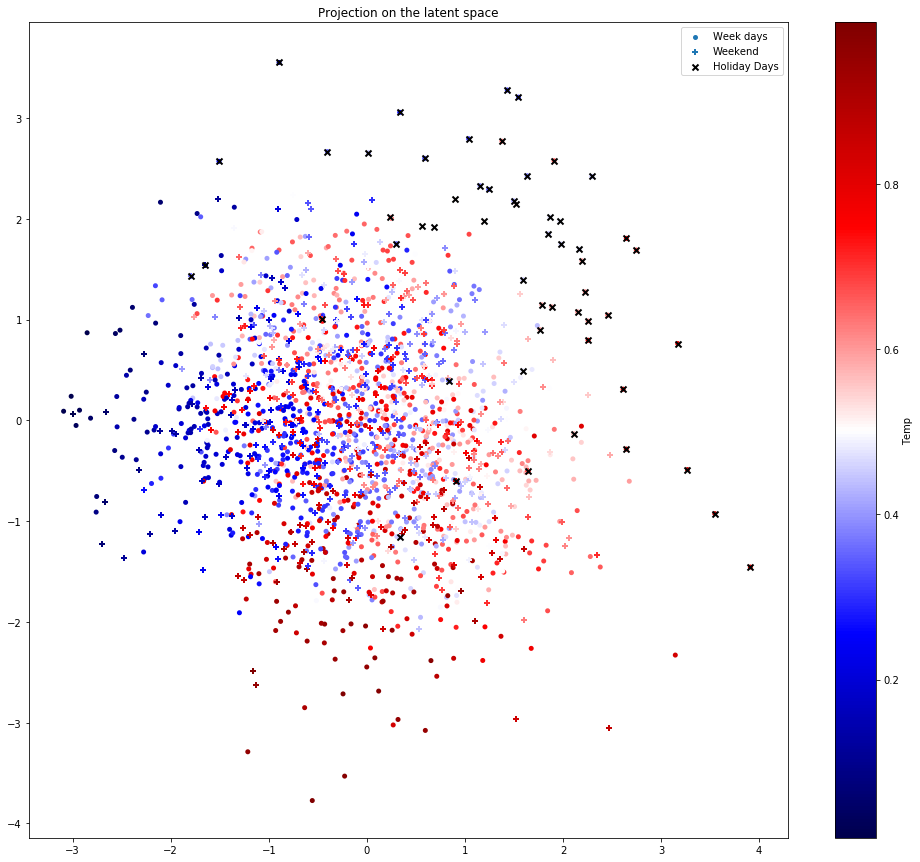

In [41]:
name_plot = 'temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)

### Analyse of the reconstruction error

In [169]:
[x, cond] = dataset['train']['x']
x_hat = model.cvae.predict(x=[x, cond])

In [170]:
res_mat = (x - x_hat)
res = res_mat.mean(axis=1)

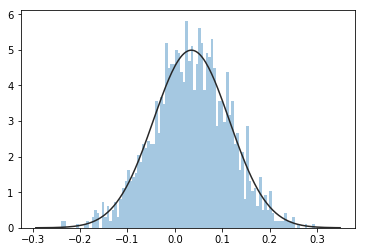

In [171]:
sn.distplot(res, kde=False, fit=stats.norm, bins=100)

In [172]:
res_conso_mat = res_mat[:,:48]
res_temp_mat = res_mat[:,48:]

In [173]:
res_conso = res_conso_mat.mean(axis=1)
res_temp = res_temp_mat.mean(axis=1)

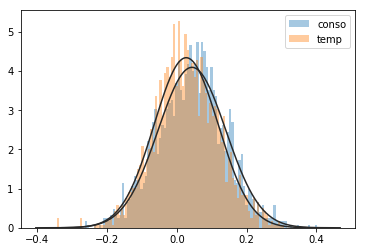

In [174]:
sn.distplot(res_conso, kde=False, fit=stats.norm, bins=100, label='conso')
sn.distplot(res_temp, kde=False, fit=stats.norm, bins=100, label='temp')
plt.legend()

In [175]:
results = dict()
results['me'] = {'all': res, 'temp': res_temp, 'conso': res_conso}

In [176]:
results['mae'] = {
    'all': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_mat),
    'conso': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_conso_mat),
    'temp': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_temp_mat)
}

In [177]:
results['z_score'] = {}
results['a_score'] = {}

for key, me in results['me'].items():
    z_score = stats.zscore(me)
    a_score = 1-2 * stats.norm.cdf(-np.abs(z_score))
    
    results['z_score'][key] = z_score
    results['a_score'][key] = a_score

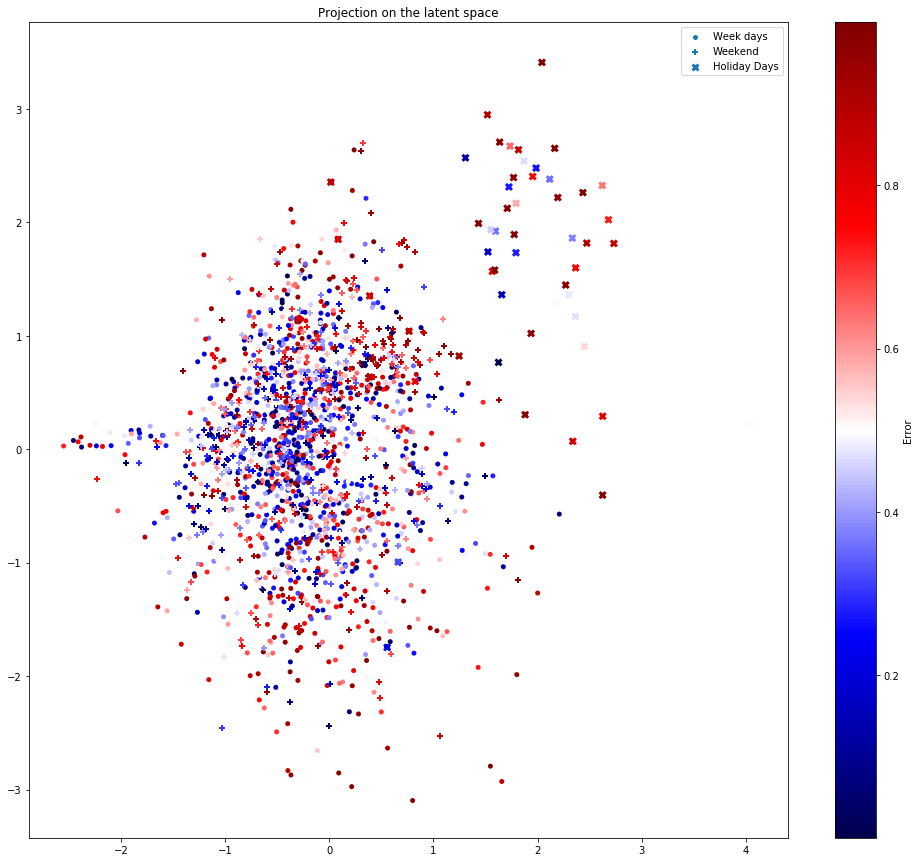

In [178]:
type_error = 'a_score'
type_data = 'all'

name_plot = '{}-{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(type_error, type_data,str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
path_plot = os.path.join(path_out,name_model,'results')

error = results[type_error][type_data]
pyplot_latent_space_projection_error(x_encoded, calendar_info, error, color='seismic', path_folder_out=path_plot, name=name_plot)

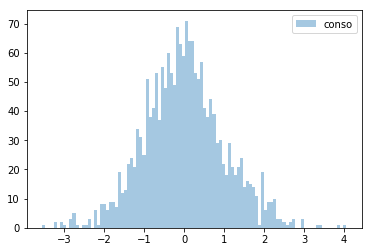

In [227]:
sn.distplot(results['z_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

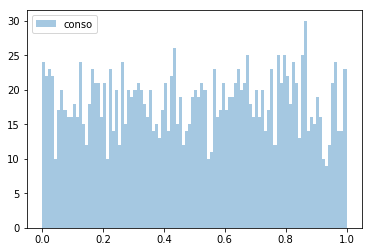

In [146]:
sn.distplot(results['a_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

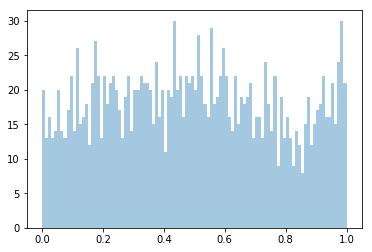

In [228]:
sn.distplot(stats.norm.cdf(results['z_score']['conso']), kde=False, bins=100, label='conso')

In [194]:
indice = 200

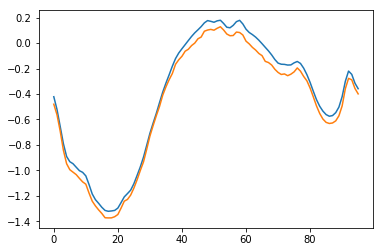

In [195]:
plt.plot(x[indice,])
plt.plot(x_hat[indice,])

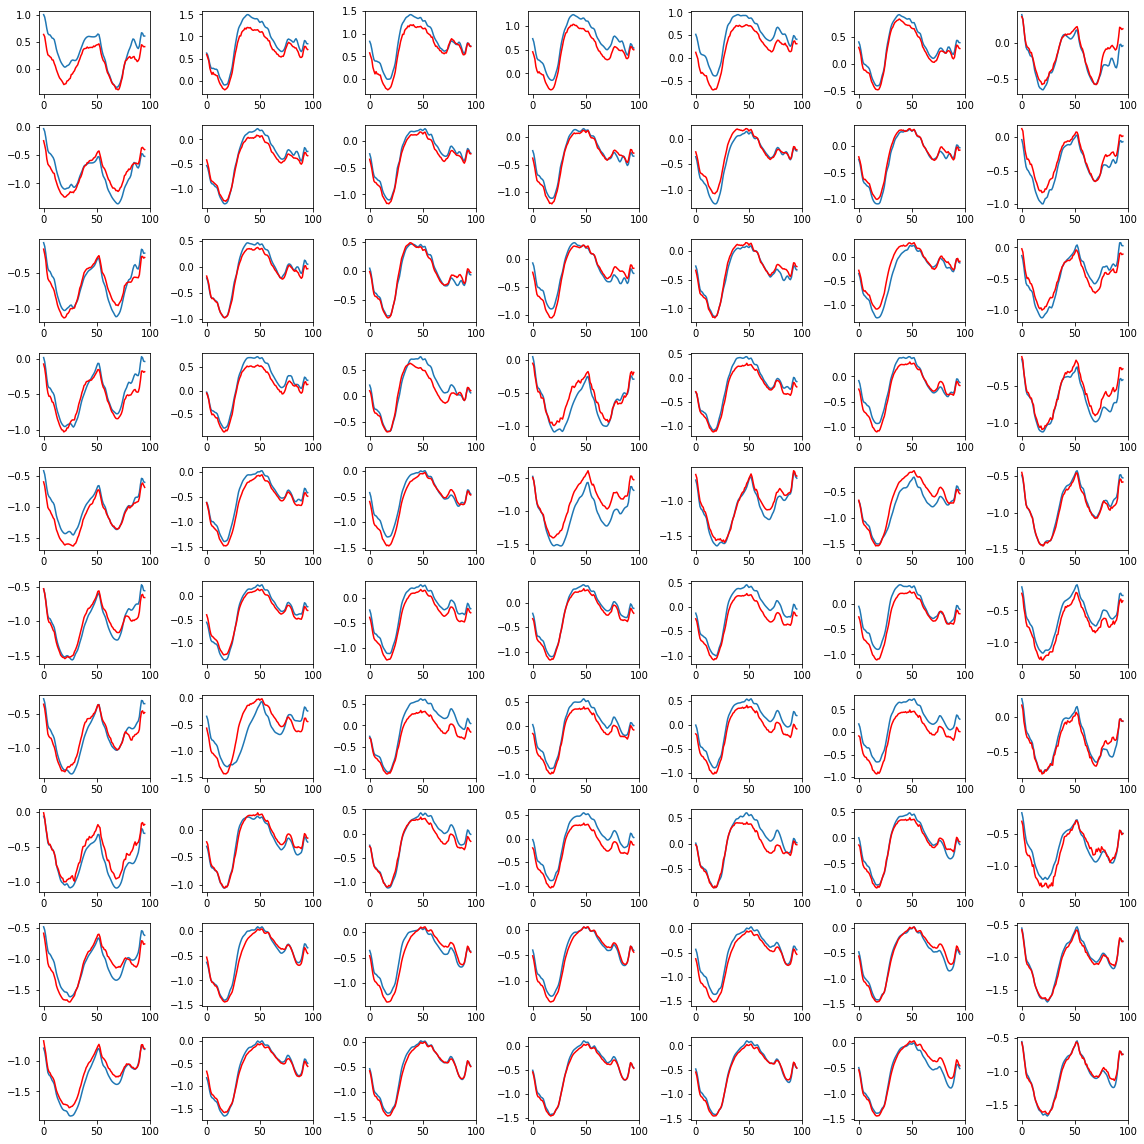

In [193]:
fig, axes = plt.subplots(10,7, figsize=(16,16))

ind = 100

for ax_row in axes:
    for ax in ax_row:
        # create a twin of the axis that shares the x-axis
        # plot some data on each axis.
        ax.plot(x[ind,:])
        ax.plot(x_hat[ind,:],'-r')
        
        ind+=1

plt.tight_layout()
plt.show()

In [228]:
model.history.keys()

dict_keys(['kl_loss', 'loss', 'recon_loss'])

In [229]:
el = model.history


In [231]:
el['kl_loss'][-1]

1.3353316627564977